# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np

# **Importing Data**

In [5]:
crop_data=pd.read_csv("/content/Crop_recommendation.csv")

# **Checking if the Dataset is clean.**

In [ ]:
crop_data.shape

(2200, 8)

In [ ]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop_data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
crop_data.duplicated().sum()

0

In [7]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
crop_data['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


# **Data Exploring**

In [24]:
corr = crop_data.corr()
corr

ValueError: could not convert string to float: 'rice'

In [10]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

NameError: name 'corr' is not defined

<ipython-input-48-bf925ce6926c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data['N'])


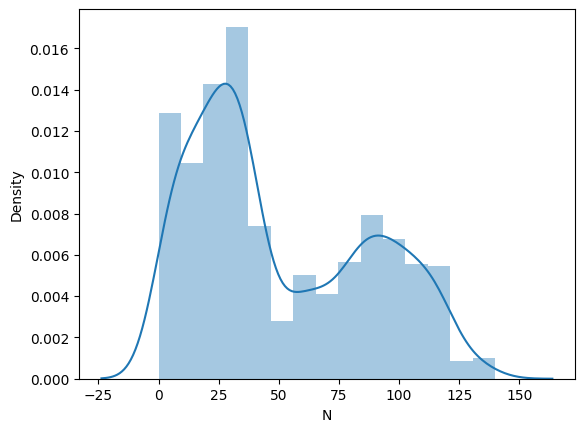

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop_data['N'])
plt.show()

# **Data Encoding**

In [11]:
crop_dictionary = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop_data['crop_num']=crop_data['label'].map(crop_dictionary)

In [12]:
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [ ]:
crop_data.drop(['label'],axis=1,inplace=True)

In [13]:
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


# **Training and Testing Data Split**

In [15]:
X = crop_data.drop(['crop_num'],axis=1)
y = crop_data['crop_num']

In [16]:
X

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [17]:
y

,crop_num
0,1
1,1
2,1
3,1
4,1
...,...
2195,22
2196,22
2197,22
2198,22


In [18]:
y.shape

(2200,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train

,N,P,K,temperature,humidity,ph,rainfall,label
1656,17,16,14,16.396243,92.181519,6.625539,102.944161,orange
752,37,79,19,27.543848,69.347863,7.143943,69.408782,blackgram
892,7,73,25,27.521856,63.132153,7.288057,45.208411,lentil
1041,101,70,48,25.360592,75.031933,6.012697,116.553145,banana
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,mango
...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,banana
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,mango
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,grapes


# **Scale the features using MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [22]:
X_train

,N,P,K,temperature,humidity,ph,rainfall,label
1656,17,16,14,16.396243,92.181519,6.625539,102.944161,orange
752,37,79,19,27.543848,69.347863,7.143943,69.408782,blackgram
892,7,73,25,27.521856,63.132153,7.288057,45.208411,lentil
1041,101,70,48,25.360592,75.031933,6.012697,116.553145,banana
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,mango
...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,banana
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,mango
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,grapes


# **Standardization**

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


ValueError: could not convert string to float: 'orange'

In [25]:
X_train

,N,P,K,temperature,humidity,ph,rainfall,label
1656,17,16,14,16.396243,92.181519,6.625539,102.944161,orange
752,37,79,19,27.543848,69.347863,7.143943,69.408782,blackgram
892,7,73,25,27.521856,63.132153,7.288057,45.208411,lentil
1041,101,70,48,25.360592,75.031933,6.012697,116.553145,banana
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,mango
...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,banana
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,mango
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,grapes


# **Training Models**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# creating instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes' : GaussianNB(),
    'Support Vector Classifier' : SVC(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Extra Tree' : ExtraTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),

}

for name, model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print(f"{name} with accuracy : {accuracy_score(y_test,y_pred)}")
  print("Confusion Matrix : ",confusion_matrix(y_test,y_pred))
  print("===========================================================")

ValueError: could not convert string to float: 'orange'

In [ ]:
# Finally Selected RandomForest model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9931818181818182

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9954545454545455

# **Predictive System**

In [ ]:
def crop_recommendation(N,P,K,temperature,humidity,ph,rainfall):
  features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
  transformed_features = ms.fit_transform(features)
  prediction = rfc.predict(transformed_features)
  print(prediction)
  return prediction[0]

In [ ]:
#New input

N=40
P=50
K=50
temperature=40.0
humidity=20
ph=100
rainfall=100

predict = crop_recommendation(N,P,K,temperature,humidity,ph,rainfall)

crop_dictionary = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
                  }
if predict in crop_dictionary:
    crop = crop_dictionary[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment.")

[6]
Papaya is a best crop to be cultivated 


In [ ]:
# new inputs 2


N = 100
P = 90
k = 100
temperature = 50.0
humidity = 90.0
ph = 100
rainfall = 202.0

predict = crop_recommendation(N,P,K,temperature,humidity,ph,rainfall)

crop_dictionary = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dictionary:
    crop = crop_dictionary[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[6]
Papaya is a best crop to be cultivated 


In [1]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standardScaler.pkl','wb'))

NameError: name 'rfc' is not defined